# Intro Code

In [20]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

[nltk_data] Downloading package vader_lexicon to C:\Users\Robert
[nltk_data]     Malka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv(r"C:\Users\Robert Malka\Desktop\aita_clean_3.2.csv")

In [3]:
df.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole
0,1ytxov,2014-02-24 21:50:51,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1
1,1yu29c,2014-02-24 22:33:04,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",True,asshole,140,27.0,1
2,1yu8hi,2014-02-24 23:31:17,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0
3,1yuc78,2014-02-25 00:05:28,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,True,everyone sucks,22,3.0,1
4,1yueqb,2014-02-25 00:29:24,[AITA] I let my story get a little long and bo...,NaN,False,not the asshole,6,4.0,0


In [4]:
df.info
#Yeah yeah, I know info doesn't work this way, so sue me.

<bound method DataFrame.info of            id            timestamp  \
0      1ytxov  2014-02-24 21:50:51   
1      1yu29c  2014-02-24 22:33:04   
2      1yu8hi  2014-02-24 23:31:17   
3      1yuc78  2014-02-25 00:05:28   
4      1yueqb  2014-02-25 00:29:24   
...       ...                  ...   
97623  ex94w5  2020-02-01 17:06:29   
97624  ex970f  2020-02-01 17:10:15   
97625  ex9dwo  2020-02-01 17:22:40   
97626  ex9egs  2020-02-01 17:23:41   
97627  ex9g78  2020-02-01 17:26:38   

                                                   title  \
0      [AITA] I wrote an explanation in TIL and came ...   
1                   [AITA] Threw my parent's donuts away   
2            I told a goth girl she looked like a clown.   
3      [AItA]: Argument I had with another redditor i...   
4      [AITA] I let my story get a little long and bo...   
...                                                  ...   
97623  AITA for telling my sister she is being a spoi...   
97624  AITA for telling my husb

In [5]:
df.dtypes

id               object
timestamp        object
title            object
body             object
edited             bool
verdict          object
score             int64
num_comments    float64
is_asshole        int64
dtype: object

# Histogram of is_asshole

### So we know what we're looking at...

(array([71117.,     0., 26511.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

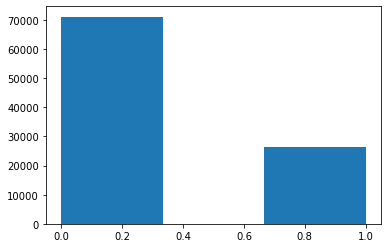

In [6]:
plt.hist(df['is_asshole'], bins=3)

Interesting! So most of the time, people are NOT considered assholes (left = nicies) -- it's actually only about 25,000 of 97,000 people -- or a little more than 25% -- of people who get deemed an asshole in the first place. Let's see how our first hypothesis goes.

## Hypothesis One - What we're measuring:

  1) How many times we see "I" in a post as correlated with the judgment of YTA/NTA.
  1a) Contrast that with number of times we see "they, she, he" in the same posts.  
  
 - Two-sided Hypothesis: 
   1) The greater the number of I's relative to other pronouns, the more likely a person will be considered an 
   Asshole. 
        - That frequency of self-reference correlates with self-centeredness, which means increased assholery.
   2) The fewer the number of I's relative to other pronouns, the less likely a person will be considered an 
   Asshole.
        - That rarity of self-references correlates with consideration of others, which means decreased assholery.
    

Sources I used/examined in figuring code out:

https://stackoverflow.com/questions/17573814/count-occurrences-of-certain-words-in-pandas-dataframe
https://stackoverflow.com/questions/49230262/how-to-count-uppercase-and-lowercase-on-pandas-dataframe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.html
https://stackoverflow.com/questions/18355416/matplotlib-pyplot-hist-returns-a-histogram-where-all-bins-have-the-same-value-wh
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.count.html

In [7]:
df['countI'] = df.body.str.count("I|I'm")


C:\Users\Robert Malka\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Robert Malka\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 563.,  804., 1085., 1532.,    0., 2134., 2622., 3066., 3490.,
           0., 3717., 3899., 4135., 4041.,    0., 4162., 4071., 3887.,
        3803.,    0., 3668., 3658., 3332., 3167.,    0., 3008., 2879.,
        2613., 2495.,    0., 2352., 2204., 2065., 1876.,    0., 1734.,
        1564., 1498., 1299.,    0., 1220., 1092., 1010.,  893.,    0.,
         797.,  762.,  651.,  575.,    0.,  463.,  428.,  373.,  331.,
           0.,  312.,  252.,  211.,  202.,    0.,  157.,  129.,  141.,
         122.,    0.,   87.,   75.,   70.,   58.,    0.,   63.,   52.,
          41.,   40.,    0.,   36.,   21.,   27.,   34.,    0.,   30.,
          17.,   15.,   21.,    0.,   23.,   17.,   16.,   17.,    0.,
          13.,   18.,   11.,    9.,    0.,    7.,    7.,   12.,    6.,
          10.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2

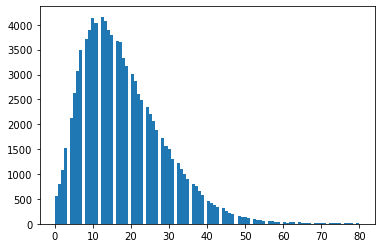

In [8]:
plt.hist(df['countI'], bins=100, range=(0, 80))

In [9]:
df['countHeSheThey'] = df.body.str.count("[Tt]hey|[Hh]e|[Ss]he")


(array([ 260.,  238.,  354.,  534.,  682., 1965., 1203., 1473., 1538.,
        1665., 3613., 2050., 1985., 2152., 2150., 4341., 2181., 2169.,
        2204., 2195., 4395., 2118., 2054., 2012., 1999., 3808., 1882.,
        1780., 1800., 1687., 3295., 1598., 1494., 1498., 1481., 2735.,
        1393., 1273., 1206., 1235., 2246., 1054., 1039., 1028.,  938.,
        1801.,  852.,  826.,  763.,  690., 1359.,  644.,  560.,  549.,
         532.,  949.,  407.,  423.,  352.,  338.,  593.,  267.,  247.,
         235.,  273.,  384.,  158.,  164.,  138.,  138.,  232.,   90.,
          96.,   83.,   95.,  137.,   61.,   44.,   59.,   38.,   95.,
          40.,   29.,   29.,   44.,   47.,   32.,   12.,   19.,   19.,
          31.,   17.,   15.,   17.,   19.,   33.,   12.,   14.,   20.,
          30.]),
 array([  0. ,   1.2,   2.4,   3.6,   4.8,   6. ,   7.2,   8.4,   9.6,
         10.8,  12. ,  13.2,  14.4,  15.6,  16.8,  18. ,  19.2,  20.4,
         21.6,  22.8,  24. ,  25.2,  26.4,  27.6,  28.8,  30

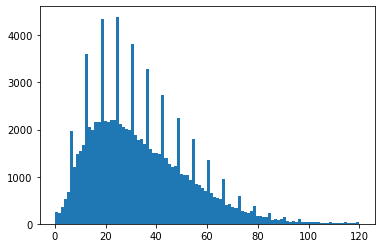

In [10]:
plt.hist(df['countHeSheThey'], bins=100, range=(0, 120))

(0.0, 120.0)

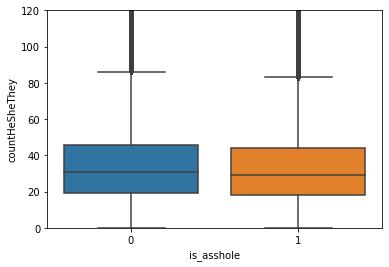

In [11]:
ax2=sns.boxplot(x="is_asshole", y="countHeSheThey", data=df)
plt.ylim(0,120)

In [12]:
#Checking to see if there are any NaN values in e.g. cell 5 of column body.

#df['body'] = df['body'].dropna()
#df = df.dropna(subset=['body'])

df['body'].values[:5]

array(['[Here is the post in question](http://www.reddit.com/r/todayilearned/comments/1y40m9/til_a_circle_of_infinite_circumference_is_a/cfhhajs?context=3)\n\nIt seems like I came off as an asshole. What can I do in the future to avoid this? I thought I was just randomly explaining something, which seems common on Reddit.\n\nI definitely shouldn\'t have said "Sorry for trying to help" - That was pretty immature and rude. \n\nAm I the asshole here?\n\nI wrote as little as possible to skew perspective as little as possible.',
       'My parents are diabetic, morbidly obese, and addicted to food. \n\nI\'m the same, minus the diabetes. I\'ve been trying for a while to eat healthily and lose weight. So have they, but yet every time they go to the store, they bring home junk food. \n\nI understand that it\'s hard for them, but it\'s also hard to stay on track with my healthier lifestyle when there\'s junk food all around me. Plus, they\'re getting older, so it is crucial for them to get heal

In [13]:
df.dropna()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole,countI,countHeSheThey
0,1ytxov,2014-02-24 21:50:51,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1,8.0,6.0
1,1yu29c,2014-02-24 22:33:04,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",True,asshole,140,27.0,1,7.0,17.0
2,1yu8hi,2014-02-24 23:31:17,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0,1.0,0.0
3,1yuc78,2014-02-25 00:05:28,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,True,everyone sucks,22,3.0,1,2.0,4.0
5,1yugsc,2014-02-25 00:48:17,AITA Had a disagreement about Les Miserables w...,I love the musical *Les Miserables*. A coworke...,False,asshole,22,15.0,1,10.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
97623,ex94w5,2020-02-01 17:06:29,AITA for telling my sister she is being a spoi...,My sister(17F) and I(15M) are white kids born ...,True,not the asshole,16,23.0,0,5.0,12.0
97624,ex970f,2020-02-01 17:10:15,AITA for telling my husband to f* off after he...,My husband (28M) and I (32F) are married for a...,True,not the asshole,1373,304.0,0,31.0,49.0
97625,ex9dwo,2020-02-01 17:22:40,AITA for attempting to keep my students out of...,Upfront apologies for formatting. I’m also try...,False,not the asshole,4,15.0,0,17.0,44.0
97626,ex9egs,2020-02-01 17:23:41,WIBTA if I left my brothers fate up to the state?,A little back story my mom is a drug addict an...,False,not the asshole,280,140.0,0,9.0,17.0


In [14]:
df['IvsHeSheThey'] = df.body.str.count("I|I'm") / df.body.str.count("they|he|she")
df['IvsHeSheThey'] = np.where(df.IvsHeSheThey.isin([np.inf, -np.inf]), df['countI'], df['IvsHeSheThey'])


(0.0, 2.0)

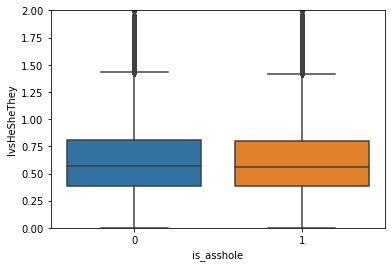

In [15]:
ax3=sns.boxplot(x="is_asshole", y="IvsHeSheThey", data=df)
plt.ylim(0,2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97628 entries, 0 to 97627
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              97628 non-null  object 
 1   timestamp       97628 non-null  object 
 2   title           97628 non-null  object 
 3   body            97541 non-null  object 
 4   edited          97628 non-null  bool   
 5   verdict         97628 non-null  object 
 6   score           97628 non-null  int64  
 7   num_comments    97628 non-null  float64
 8   is_asshole      97628 non-null  int64  
 9   countI          97541 non-null  float64
 10  countHeSheThey  97541 non-null  float64
 11  IvsHeSheThey    97446 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(5)
memory usage: 8.3+ MB


In [17]:
df.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole,countI,countHeSheThey,IvsHeSheThey
0,1ytxov,2014-02-24 21:50:51,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1,8.0,6.0,1.600000
1,1yu29c,2014-02-24 22:33:04,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",True,asshole,140,27.0,1,7.0,17.0,0.411765
2,1yu8hi,2014-02-24 23:31:17,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0,1.0,0.0,1.000000
3,1yuc78,2014-02-25 00:05:28,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,True,everyone sucks,22,3.0,1,2.0,4.0,0.500000
4,1yueqb,2014-02-25 00:29:24,[AITA] I let my story get a little long and bo...,NaN,False,not the asshole,6,4.0,0,NaN,NaN,NaN


In [18]:
#Hypothesis 1 throwaway code

#df['IvsHeSheThey'] = list(df['body']).str.count("I", "I'm") / list(df['body']).str.count("they", "he", "she")
#unsupported operand type(s) for &: 'str' and 'int' <-- why is this?
#df['IvsHeSheThey'] = pd.DataFrame(["I", "I'm"], columns=['body']).str.count / pd.DataFrame(["they", "he", "she"], columns=['body']).str.count


'''
n = x / 0
def reg
    for n in fraction:
        if n:
            n * 0
        print(n * 100, '%')
    
   '''         

#if n / 0: then % = n x 100
#let's clean this ^^ up
#df['IvsHeSheThey'] = df.IvsHeSheThey.replace([np.inf, -np.inf], df['countI'])
#IvHST = df['IvsHeSheThey']
#is_asshole = df['is_asshole']

#plot this as a histogram
#plt.hist(kind='box', x='is_asshole', y='I')
#plt.hist(IvHST, is_asshole, legend=True)
#plt.hist((IvsHeSheThey, is_asshole), histtype='bar')

#ax = sns.swarmplot(x="is_asshole", y="IvsHeSheThey", data=df)
#plt.ylim(0, 5)
#set a max for y axis
#plt.show()

#df.loc[df.id=='2ft7yg','body'].to_list()
#df['body'] = df['body'].replace(r"[\â€™\â€œ\â€]", '\'')
#df[df['edited'].apply(lambda x: 'F' in x)]['edited'].values
#df['edited']=df['edited'].apply(lambda x: len(x) > 7) #setting equal to series



"\nn = x / 0\ndef reg\n    for n in fraction:\n        if n:\n            n * 0\n        print(n * 100, '%')\n    \n   "

## Hypothesis 2 - What we're measuring:

2) Length of post relative to YTA/NTA (which might tell us how much justification a person applied to their 
situation, or how invested they are, etc. -- still considering how to expose any insights using this data.

Hypotheses: 
    1) level of thoughtfulness committed to a situation (positive); 
    2) level of self-rationalization about a situation (negative). 
    
    Question is how to manifest this given other features/targets. May remove.
 


Sources I used/examined in coding this:

https://stackoverflow.com/questions/37483470/how-to-calculate-number-of-words-in-a-string-in-dataframe
https://stackoverflow.com/questions/17573814/count-occurrences-of-certain-words-in-pandas-dataframe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
https://stackoverflow.com/questions/52552066/dask-compute-gives-attributeerror-series-object-has-no-attribute-encode/52553957#52553957
https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split
https://stackoverflow.com/questions/21415661/logical-operators-for-boolean-indexing-in-pandas

In [28]:
df.dropna()
df = df[df['body'].notnull()]

df['post_word_count'] = [len(item.split()) for item in df['body'].values]

(0.0, 1000.0)

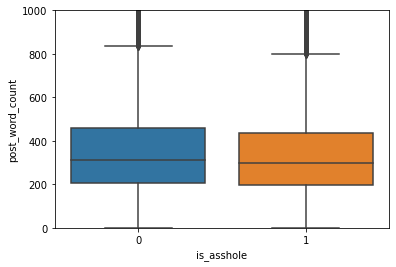

In [29]:
#boxplot (strip plot?) to check post length vs is_asshole
ax4=sns.boxplot(x="is_asshole", y="post_word_count", data=df)
plt.ylim(0,1000)

In [30]:
df['IoverPostCount'] = df.countI / df.post_word_count


C:\Users\Robert Malka\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Robert Malka\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([5.990e+02, 2.020e+02, 2.800e+02, 3.330e+02, 3.650e+02, 4.370e+02,
        5.400e+02, 5.970e+02, 6.500e+02, 7.770e+02, 9.470e+02, 1.095e+03,
        1.244e+03, 1.398e+03, 1.534e+03, 1.758e+03, 2.031e+03, 2.236e+03,
        2.525e+03, 2.579e+03, 3.135e+03, 3.236e+03, 3.534e+03, 3.593e+03,
        3.602e+03, 4.034e+03, 3.925e+03, 4.020e+03, 3.954e+03, 3.816e+03,
        3.878e+03, 3.661e+03, 3.391e+03, 3.147e+03, 2.963e+03, 2.806e+03,
        2.377e+03, 2.227e+03, 1.983e+03, 1.716e+03, 1.608e+03, 1.349e+03,
        1.181e+03, 9.790e+02, 8.840e+02, 7.350e+02, 6.210e+02, 4.790e+02,
        4.120e+02, 2.880e+02, 3.530e+02, 2.780e+02, 2.220e+02, 1.860e+02,
        1.270e+02, 1.150e+02, 9.700e+01, 8.000e+01, 6.800e+01, 3.500e+01,
        5.800e+01, 3.300e+01, 3.000e+01, 3.000e+01, 2.400e+01, 1.800e+01,
        1.600e+01, 1.400e+01, 1.300e+01, 1.000e+00, 6.000e+00, 1.000e+01,
        7.000e+00, 8.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00,
        7.000e+00, 1.000e+00, 1.000e+0

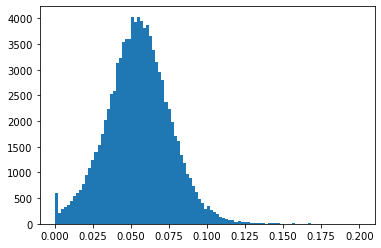

In [31]:
plt.hist(df['IoverPostCount'], bins=100, range=(0,0.2))

(0.0, 0.125)

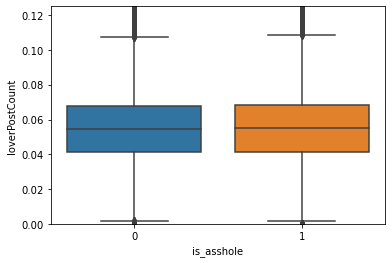

In [32]:
ax5=sns.boxplot(x="is_asshole", y="IoverPostCount", data=df)
plt.ylim(0,0.125)

In [33]:
#Throwaway code for Hypothesis 2

#df['body'].select_dtypes(include=str, exclude=float)
#df['post_word_count'] = df['body'].str.split().apply(len).value_counts()
#df['post_word_count'] = len(df['body'].split())
#df['post_word_count'] = len(df.body.apply(lambda x: x.split()))
#df['post_word_count'] = df.body.apply(lambda x: len(x.split()))
#df['post_word_count'] = df['body'].str.count(' ').add(1).value_counts(sort=False)

#the below works, but I wonder why the NaN values are there -- is it freaking out once it encounters float values?
#The vast majority of them are NaN. Need to fix.

#df['post_word_count'] = df['body'].str.count(' ').add(1).value_counts(sort=False, dropna=True)
#df['post_word_count'] = [len(item.split()) for item in df['body'].values]


In [34]:
df.describe()

,score,num_comments,is_asshole,countI,countHeSheThey,IvsHeSheThey,post_word_count,IoverPostCount
count,97541.000000,97541.000000,97541.000000,97541.000000,97541.000000,97446.000000,97541.000000,97540.000000
mean,324.838099,85.332168,0.271383,18.017921,33.978348,0.651817,337.229575,0.054850
std,1965.611905,312.535658,0.444676,11.427630,21.317624,0.461735,183.968386,0.021349
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,14.000000,0.000000,10.000000,19.000000,0.388889,203.000000,0.041475
50%,10.000000,23.000000,0.000000,16.000000,30.000000,0.566038,309.000000,0.054795
75%,37.000000,46.000000,1.000000,24.000000,45.000000,0.800000,452.000000,0.068063
max,59187.000000,11906.000000,1.000000,286.000000,689.000000,18.000000,5507.000000,1.000000


## Hypothesis 3

### This one's still in progress:

3) Categorizing data (through title) under four broad headings: 
  3a) Romantic Relationships
  	- Described using word embeddings: "My Boyfriend," "My Girlfriend," "My Partner," &c. 
  	- Will also look for "Cheating"
  3b) Familial Disagreement 
    - "My Mom, Sister, Dad, Grandma, Grandpa, Grandparents, Brother, Cousin," &c
  3c) Professional Concerns 
    - "My Boss, My co-worker, My Colleague", &c.
  3d) None of the Above (Miscellaneous)

###### SEE IF POSSIBLE TO MAKE CLEAN. (Pick only ones that are one or the other etc. or e.g. >95% familial).

Might be more reasonable to do professional vs personal. Maybe go about this in a more bottom-up way (try 
clustering your data to see how it clusters, and see if that helps you choose your categories). -- separating 
categories is good. Might have to cherrypick data, since there's enough - that could be okay. That'll take some 
finagling.


At present, no hypothesis matches:
Hypothesis: More likely to be the asshole if you're writing about romantic or professional? etc.


## Need to:

#### Preprocess text data -- nlp briefing, clean text data for numeric conversion.
  ##### Removing text characters, noise, &c. things you might need to do before doing bag of words
#### Use bag of words to convert text to numeric vector.
  ##### Word embeddings is another way (more complicated than bag of words)
#### Then you can apply k-means clustering to those vectors
  ##### Can check which of the text forms under this k-means cluster.
    
#### Centroid clustering -- look it up, see what key features you can extract and what the features/words of each are.
#### Need to be able to extract centroid features. Develop intuition for this learning.


#FIRST: Cluster thread subjects by mention of [parter/spouse] OR [parent figure/sibling] OR [Boss]. 
#Pick all the ones that have ONLY one OR the other OR the third. The rest, we'll delete. See how many there are.
#K-means cluster here. 


Sources I used:

https://www.kaggle.com/kakiac/sentiment-analysis-with-nltk
https://stackoverflow.com/questions/47125665/simple-dask-map-partitions-example
https://medium.com/@b.terryjack/nlp-pre-trained-sentiment-analysis-1eb52a9d742c
https://www.reddit.com/r/datascience/comments/8qde2g/sentiment_analysis_in_python_any_pretrained_models/
https://github.com/openai/generating-reviews-discovering-sentiment
http://nlp.town/blog/off-the-shelf-sentiment-analysis/ a fun little blog
https://t-redactyl.io/blog/2017/04/using-vader-to-handle-sentiment-analysis-with-social-media-text.html explaining how VADER works
https://towardsdatascience.com/text-classification-with-state-of-the-art-nlp-library-flair-b541d7add21f if I want to use flair instead of VADER
https://pypi.org/project/wordcloud/

In [57]:
from wordcloud import WordCloud,STOPWORDS
from subprocess import check_output
nltk.download('subjectivity')

[nltk_data] Downloading package subjectivity to C:\Users\Robert
[nltk_data]     Malka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\subjectivity.zip.


True

In [69]:
n_instances = 97000
subj_docs = [(df['title'], 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(df['title'], 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(5000, 5000)

In [71]:
#seems like every spot in the index is made up of the entirety of the dataset - tried to do df['title'][0] 
#but of course that only showed the first one. Wondering how to split up the individual sentences...

subj_docs[5]

# Output should be e.g.: (['smart', 'and', 'alert', ',', 'thirteen', 'conversations', 'about', 'one',
# 'thing', 'is', 'a', 'small', 'gem', '.'], 'subj')

(0        [AITA] I wrote an explanation in TIL and came ...
 1                     [AITA] Threw my parent's donuts away
 2              I told a goth girl she looked like a clown.
 3        [AItA]: Argument I had with another redditor i...
 5        AITA Had a disagreement about Les Miserables w...
                                ...                        
 97623    AITA for telling my sister she is being a spoi...
 97624    AITA for telling my husband to f* off after he...
 97625    AITA for attempting to keep my students out of...
 97626    WIBTA if I left my brothers fate up to the state?
 97627    WIBTA for rocking the boat at work because my ...
 Name: title, Length: 97541, dtype: object, 'subj')

In [73]:
'''
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

sentim_analyzer = SentimentAnalyzer()


#all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])
#TypeError: expected string or bytes-like object
'''

In [74]:
#Simple unigram word features are then used, handling negation:

#Can't run this until above error resolved.

'''
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)
# output: 83
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

'''

NameError: name 'all_words_neg' is not defined

In [ ]:
#Then, features are applied to obtain a feature-value representation of the datasets:

'''
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)
'''

In [ ]:
#At this stage, we are ready to train our classifier on the training set, and output the evaluation results:

'''
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)

# output: Training classifier

for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))
    '''

In [75]:
#Have to think about what to put here vs previous - obvious goal for hyp. 6 is the entire df['title'].
#For hyp. 3, it's also df[title], but with the intention of grouping by k-means cluster afterwards.


'''
Defining list of test sentences:

sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
   "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
   "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
   "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
   "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
   "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
   "The book was good.",         # positive sentence
   "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
   "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
   "A really bad, horrible book.",       # negative sentence with booster words
   "At least it isn't a horrible book.", # negated negative sentence with contraction
   ":) and :D",     # emoticons handled
   "",              # an empty string is correctly handled
   "Today sux",     #  negative slang handled
   "Today sux!",    #  negative slang with punctuation emphasis handled
   "Today SUX!",    #  negative slang with capitalization emphasis
   "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
]

Defining 'tricky' sentences dataset:

tricky_sentences = [
    "Most automated sentiment analysis tools are shit.",
    "VADER sentiment analysis is the shit.",
    "Sentiment analysis has never been good.",
    "Sentiment analysis with VADER has never been this good.",
    "Warren Beatty has never been so entertaining.",
    "I won't say that the movie is astounding and I wouldn't claim that \
    the movie is too banal either.",
    "I like to hate Michael Bay films, but I couldn't fault this one",
    "It's one thing to watch an Uwe Boll film, but another thing entirely \
    to pay for it",
    "The movie was too good",
    "This movie was actually neither that funny, nor super witty.",
    "This movie doesn't care about cleverness, wit or any other kind of \
    intelligent humor.",
    "Those who find ugly meanings in beautiful things are corrupt without \
    being charming.",
    "There are slow and repetitive parts, BUT it has just enough spice to \
    keep it interesting.",
    "The script is not fantastic, but the acting is decent and the cinematography \
    is EXCELLENT!",
    "Roger Dodger is one of the most compelling variations on this theme.",
    "Roger Dodger is one of the least compelling variations on this theme.",
    "Roger Dodger is at least compelling as a variation on the theme.",
    "they fall in love with the product",
    "but then it breaks",
    "usually around the time the 90 day warranty expires",
    "the twin towers collapsed today",
    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
    under orders and in the ''least offensive way possible.''"
 ]

sentences.extend(tricky_sentences)

Handling paragraphs:

paragraph = "It was one of the worst movies I've seen, despite good reviews. \
 Unbelievably bad acting!! Poor direction. VERY poor production. \
 The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

'''

SyntaxError: invalid syntax (<ipython-input-75-8c4000aaa602>, line 3)

In [ ]:
'''

from nltk import tokenize
lines_list = tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)

4. Loading the Sentiment Intensity Analyser.

sid = SentimentIntensityAnalyzer()
for sentence in sentences:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
         print('{0}: {1}, '.format(k, ss[k]), end='')
     print()

'''

In [36]:
'''

# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
     
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()


kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

'''

"\n\n# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? \nkmeans3 = KMeans(n_clusters=3)\ny_kmeans3 = kmeans3.fit_predict(x)\nplt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')\n\ncenters = kmeans3.cluster_centers_\nplt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);\n\n"

## Hypothesis 4 - What we're measuring:

4) Whether or not the post ends with a question mark (asking for feedback from the crowd, versus making a 
statement of some kind. Of course possible that they didn't put the "?" down and were asking the question).

Hypotheses: 
    1) That asking a question shows an openness to being wrong (and thus suggests they're less likely to 
be an asshole), whereas 
    2) Making a statement (period or no punctuation) at the end of their evaluation shows a disregard for the 
    crowd, leading to a greater possibility that they'll be evaluated as an asshole.

Sources I investigated:

https://thispointer.com/check-the-first-or-last-character-of-a-string-in-python/
https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

In [37]:
df['questionmarklast'] = df.body.str.endswith('?')

In [38]:
df.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole,countI,countHeSheThey,IvsHeSheThey,post_word_count,IoverPostCount,questionmarklast
0,1ytxov,2014-02-24 21:50:51,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1,8.0,6.0,1.600000,73,0.109589,False
1,1yu29c,2014-02-24 22:33:04,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",True,asshole,140,27.0,1,7.0,17.0,0.411765,131,0.053435,False
2,1yu8hi,2014-02-24 23:31:17,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0,1.0,0.0,1.000000,3,0.333333,False
3,1yuc78,2014-02-25 00:05:28,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,True,everyone sucks,22,3.0,1,2.0,4.0,0.500000,2,1.000000,False
5,1yugsc,2014-02-25 00:48:17,AITA Had a disagreement about Les Miserables w...,I love the musical *Les Miserables*. A coworke...,False,asshole,22,15.0,1,10.0,17.0,0.588235,182,0.054945,True


In [39]:
df["questionmarklast"] = df["questionmarklast"].astype(int)

In [40]:
df.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole,countI,countHeSheThey,IvsHeSheThey,post_word_count,IoverPostCount,questionmarklast
0,1ytxov,2014-02-24 21:50:51,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1,8.0,6.0,1.600000,73,0.109589,0
1,1yu29c,2014-02-24 22:33:04,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",True,asshole,140,27.0,1,7.0,17.0,0.411765,131,0.053435,0
2,1yu8hi,2014-02-24 23:31:17,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0,1.0,0.0,1.000000,3,0.333333,0
3,1yuc78,2014-02-25 00:05:28,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,True,everyone sucks,22,3.0,1,2.0,4.0,0.500000,2,1.000000,0
5,1yugsc,2014-02-25 00:48:17,AITA Had a disagreement about Les Miserables w...,I love the musical *Les Miserables*. A coworke...,False,asshole,22,15.0,1,10.0,17.0,0.588235,182,0.054945,1


(array([53325.,     0., 44216.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

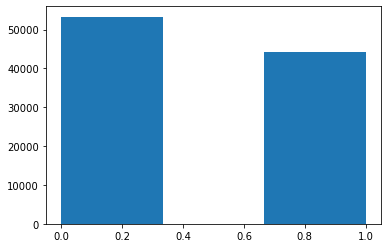

In [41]:
plt.hist(df['questionmarklast'], bins=3)

(0.0, 2.0)

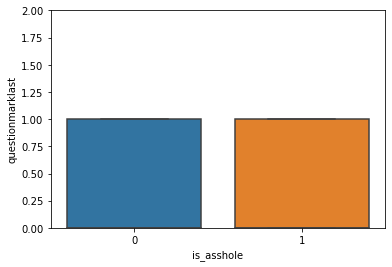

In [42]:
ax6=sns.boxplot(x="is_asshole", y="questionmarklast", data=df)
plt.ylim(0,2)

In [43]:
#Throwaway code for hypothesis 4:

#perhaps worth explicitly disregarding other punctuation (e.g. commas) that might appear at the end? Eh.
#Coding approach: new column = df[assholequestionmark]. Last character of the body thread is a '?', then 
#put "Y" in column, else "N" in column.
#df['questionmarklast'] = df['body'][-1]
#df['post_word_count'] = [len(item.split()) for item in df['body'].values]
#pseudo-pseudo-code.
#    if df['questionmarklast'] = "?"
#    then print("True")
#    else
#        print("False")

## Hypothesis 5 - What we're measuring:

5) "Would I be the asshole" vs "Am i the asshole?"

Hypothesis: The conditional suggests a person who is more cautious, which means a person who is less likely 
to engage in assholery.

Null Hypothesis: There is no correlation between the hypothetical phrasing and the "actual" phrasing.


In [44]:
df['WIBTA_phrasing'] = df.title.str.contains("WIBTA|Would I be the asshole", regex=True)
df['AITA_phrasing'] = df.title.str.contains("AITA|Am I the asshole", regex=True)

df["WIBTA_phrasing"] = df["WIBTA_phrasing"].astype(int)
df["AITA_phrasing"] = df["AITA_phrasing"].astype(int)

In [45]:
df.head()

,id,timestamp,title,body,edited,verdict,score,num_comments,is_asshole,countI,countHeSheThey,IvsHeSheThey,post_word_count,IoverPostCount,questionmarklast,WIBTA_phrasing,AITA_phrasing
0,1ytxov,2014-02-24 21:50:51,[AITA] I wrote an explanation in TIL and came ...,[Here is the post in question](http://www.redd...,False,asshole,52,13.0,1,8.0,6.0,1.600000,73,0.109589,0,0,1
1,1yu29c,2014-02-24 22:33:04,[AITA] Threw my parent's donuts away,"My parents are diabetic, morbidly obese, and a...",True,asshole,140,27.0,1,7.0,17.0,0.411765,131,0.053435,0,0,1
2,1yu8hi,2014-02-24 23:31:17,I told a goth girl she looked like a clown.,I was four.,False,not the asshole,74,15.0,0,1.0,0.0,1.000000,3,0.333333,0,0,0
3,1yuc78,2014-02-25 00:05:28,[AItA]: Argument I had with another redditor i...,http://www.reddit.com/r/HIMYM/comments/1vvfkq/...,True,everyone sucks,22,3.0,1,2.0,4.0,0.500000,2,1.000000,0,0,0
5,1yugsc,2014-02-25 00:48:17,AITA Had a disagreement about Les Miserables w...,I love the musical *Les Miserables*. A coworke...,False,asshole,22,15.0,1,10.0,17.0,0.588235,182,0.054945,1,0,1


(array([80766.,     0., 16775.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

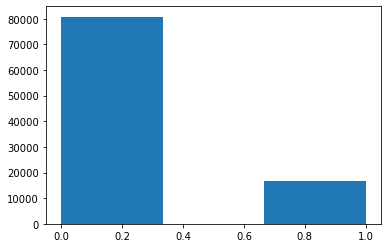

In [46]:
plt.hist(df['WIBTA_phrasing'], bins=3)

(array([17674.,     0., 79867.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

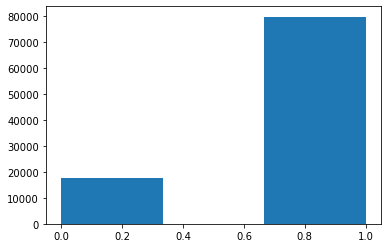

In [47]:
plt.hist(df['AITA_phrasing'], bins=3)

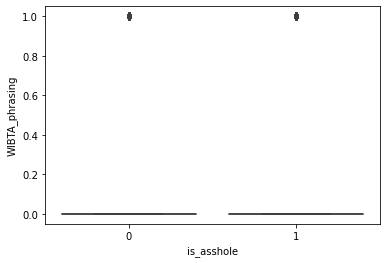

In [48]:
ax7 = sns.boxplot(x="is_asshole", y="WIBTA_phrasing", data=df)


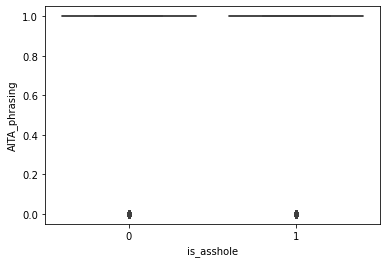

In [49]:
ax8 = sns.boxplot(x="is_asshole", y="AITA_phrasing", data=df)


In [50]:
#Throwaway code for hypothesis five:

'''
Coding approach:
    Search for "WIBTA" and "Would I be the asshole", put that in a column df[WIBTA_phrasing] (Y/N) and count 
    against YTA/NTA.
'''


#Search each individual cell in 'title' for the following strings:
# WIBTA
# Would I be the asshole
# AITA
# Am I the asshole

#The first two can be labelled "0" and the latter two can be labelled "1". We count in a grid matrix where Y is
# WIBTA vs AITA and X is Asshole vs Not Asshole. We look at the numbers and then apply stats to check and see if
#it deviates at all from randomness.

#below code: how to check a substring is in a string.
'''
int isSubstring(string s1, string s2) 
{ 
    int M = s1.length(); 
    int N = s2.length(); 
  
    #/* A loop to slide pat[] one by one */
    for (int i = 0; i <= N - M; i++) { 
        int j; 
  
        #/* For current index i, check for pattern match */
        for (j = 0; j < M; j++) 
            if (s2[i + j] != s1[j]) 
                break; 
  
        if (j == M) 
            return i; 
    } 
  
    return -1; 
} 
    '''

'\nint isSubstring(string s1, string s2) \n{ \n    int M = s1.length(); \n    int N = s2.length(); \n  \n    #/* A loop to slide pat[] one by one */\n    for (int i = 0; i <= N - M; i++) { \n        int j; \n  \n        #/* For current index i, check for pattern match */\n        for (j = 0; j < M; j++) \n            if (s2[i + j] != s1[j]) \n                break; \n  \n        if (j == M) \n            return i; \n    } \n  \n    return -1; \n} \n    '

# Hypothesis Six - What we're measuring:

## This one is still in progress.

6) Looking for adjectives that suggest passion/anger/frustration, and if there's a correlation between valence
and assholery. 

**From there, we look for certain adjectives, which will require a little more sleuthing. We'll take out 
definite and indefinite articles, prepositions, etc.**

"If any of these adjectives are included, then --> YTA/NTA"

Theory:
    That words that suggest a higher emotional valence will indicate a *lesser* inclination for assholery. (Example: "AITA for abandoning my depressed friend?") It shows the writer's self-awareness (they're more interested in writing something that gets a lot of attention/is eye-catching, to validate that they're NOT an asshole).
        
Looking at Subject lines ("title"), ideally in this way through sentiment analysis:

[subject] [adjective with valence] [event with valence], trying to suss out AITA. 



In [51]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores()
    df['title'] for 
    
    
    #pass every sentence into a for loop
    #don't try to do it all at the same time.
    
    #Look at the documentation. Know what the input accepts, e.g. not ra pandas series.

t_data['sentiment']=t_data.map_partitions(lambda df : df.apply(polar,axis=1))

'''
def polar(data):
    data=scale(sid.polarity_scores(data.tweet)['compound'])
    return data

t_data['sentiment'] = t_data.map_partitions(polar, meta=('sentiment', int))
'''






IndentationError: unexpected indent (<ipython-input-51-f6fe033a7d19>, line 3)

# Heatmap

In [77]:
#Calculate the correlation coefficients
corr = df.corr(method='pearson', min_periods=1) 
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,edited,score,num_comments,is_asshole,countI,countHeSheThey,IvsHeSheThey,post_word_count,IoverPostCount,questionmarklast,WIBTA_phrasing,AITA_phrasing
edited,1.000000,0.070000,0.100000,0.090000,0.140000,0.120000,-0.000000,0.150000,0.010000,-0.380000,0.020000,-0.010000
score,0.070000,1.000000,0.840000,-0.010000,0.050000,0.060000,-0.020000,0.060000,-0.000000,-0.030000,-0.030000,0.030000
num_comments,0.100000,0.840000,1.000000,0.040000,0.060000,0.060000,-0.010000,0.070000,-0.000000,-0.030000,-0.040000,0.040000
is_asshole,0.090000,-0.010000,0.040000,1.000000,-0.020000,-0.020000,-0.000000,-0.030000,0.010000,-0.050000,-0.020000,0.020000
countI,0.140000,0.050000,0.060000,-0.020000,1.000000,0.640000,0.200000,0.800000,0.400000,-0.070000,-0.050000,0.060000
countHeSheThey,0.120000,0.060000,0.060000,-0.020000,0.640000,1.000000,-0.350000,0.900000,-0.210000,-0.060000,-0.040000,0.050000
IvsHeSheThey,-0.000000,-0.020000,-0.010000,-0.000000,0.200000,-0.350000,1.000000,-0.160000,0.680000,-0.000000,0.020000,-0.010000
post_word_count,0.150000,0.060000,0.070000,-0.030000,0.800000,0.900000,-0.160000,1.000000,-0.120000,-0.080000,-0.040000,0.050000
IoverPostCount,0.010000,-0.000000,-0.000000,0.010000,0.400000,-0.210000,0.680000,-0.120000,1.000000,0.010000,-0.010000,0.020000
questionmarklast,-0.380000,-0.030000,-0.030000,-0.050000,-0.070000,-0.060000,-0.000000,-0.080000,0.010000,1.000000,-0.010000,0.020000


In [ ]:
df.to_csv("AITA_EDA_4.0.csv", index=False)